In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
#from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
# import some data to play with
iris=pd.read_csv("iris.csv",index_col=0)
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
146,6.7,3.0,5.2,2.3,virginica
147,6.3,2.5,5.0,1.9,virginica
148,6.5,3.0,5.2,2.0,virginica
149,6.2,3.4,5.4,2.3,virginica
150,5.9,3.0,5.1,1.8,virginica


In [25]:
# complete iris dataset
label_encoder=preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [26]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [27]:
x

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0
149,6.2,3.4,5.4,2.3


In [28]:
y

1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int32

In [29]:
iris['Species'].unique()

array([0, 1, 2])

In [32]:
iris['Species'].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [33]:
columns=list(iris.columns)
columns

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [46]:
#spliting data into training amd testing datasets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# Building Desicion Tree Classifier Using Entropy CXriteria

In [48]:
model=DecisionTreeClassifier(criterion='entropy')   #by default it take gini criterion
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 199.32, 'X[2] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(141.64615384615385, 163.07999999999998, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue 

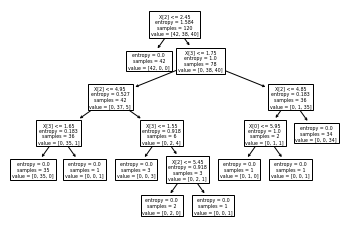

In [49]:
#plot the decision tree
tree.plot_tree(model)

[Text(464.99999999999994, 830.5, 'peal length <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(393.46153846153845, 679.5, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(536.5384615384615, 679.5, 'petal width <= 1.75\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = verginica'),
 Text(286.15384615384613, 528.5, 'peal length <= 4.95\nentropy = 0.527\nsamples = 42\nvalue = [0, 37, 5]\nclass = versicolor'),
 Text(143.07692307692307, 377.5, 'petal width <= 1.65\nentropy = 0.183\nsamples = 36\nvalue = [0, 35, 1]\nclass = versicolor'),
 Text(71.53846153846153, 226.5, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(214.61538461538458, 226.5, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = verginica'),
 Text(429.23076923076917, 377.5, 'petal width <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]\nclass = verginica'),
 Text(357.6923076923077, 226.5, 'entropy = 0.0\nsamples = 3\

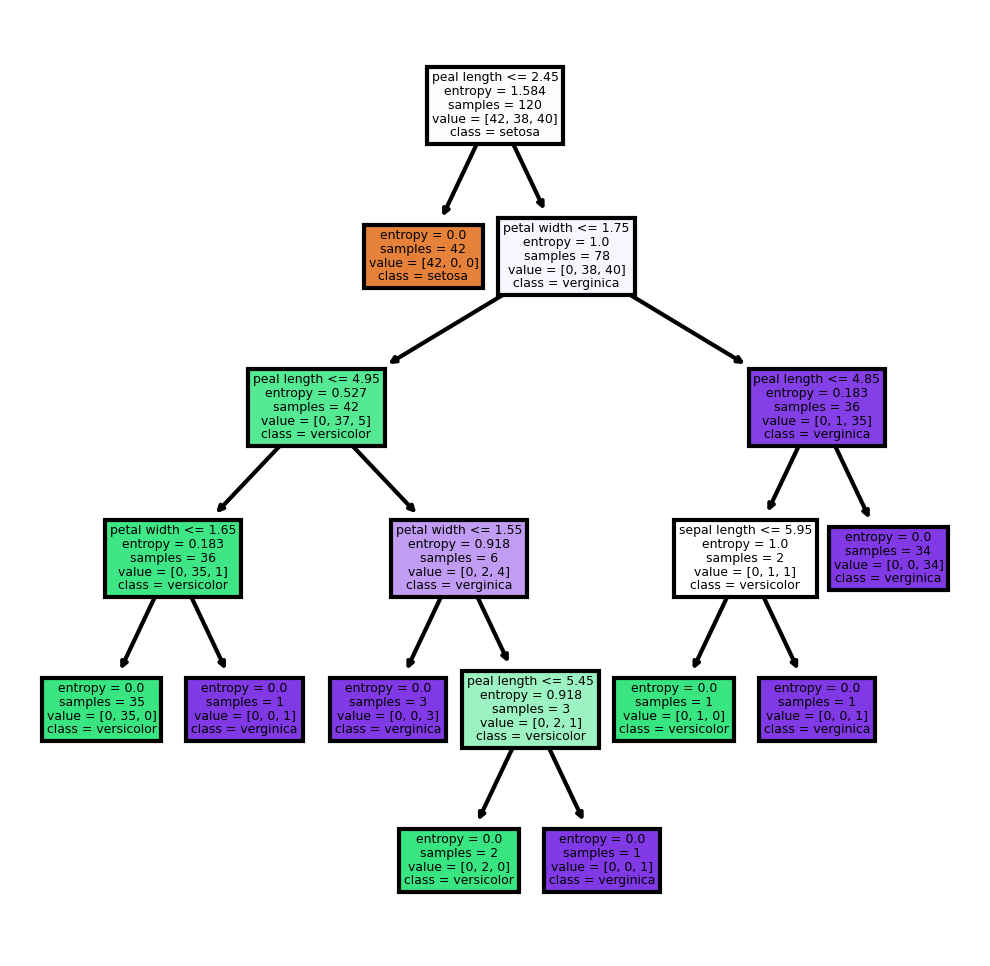

In [50]:
fn=['sepal length','sepal width','peal length','petal width']
cn=['setosa','versicolor','verginica']
fig, axes =plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)  #dpi=display pixels
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [51]:
# predicting on test data
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    12
2    10
0     8
dtype: int64

In [52]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [55]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand currect and wrong prediction

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [56]:
#Accuracy
np.mean(preds==y_test)

1.0

# Build Decision Tree Classifier (CART) Gini criterion

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)  

In [60]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [62]:
#prediction and computing accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.9666666666666667

In [63]:
pred

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [64]:
y_test

39     0
67     1
116    2
118    2
90     1
137    2
69     1
95     1
85     1
29     0
91     1
12     0
41     0
127    2
80     1
145    2
124    2
125    2
77     1
60     1
133    2
106    2
54     1
18     0
65     1
19     0
14     0
117    2
10     0
82     1
Name: Species, dtype: int32

# Decision Tree Regression Example

In [65]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
array=iris.values
X=array[:,0:3]
Y=array[:,3]

In [67]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

In [68]:
model1=DecisionTreeRegressor()
model1.fit(x_train,y_train)

DecisionTreeRegressor()

In [69]:
# Find the Accuracy
model1.score(x_test,y_test)

0.8529235202305199

In [70]:
pred=model1.predict(x_test)
errors=pred-y_test
mape=np.mean(abs(errors/y_test))*100
mape

20.583645537394357

In [71]:
newdata=np.array([4.7,3.2,1.3]).reshape(1,-1)
model1.predict(newdata)

array([0.2])